In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

import statsmodels.formula.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor
import xgboost
from sklearn.neural_network import MLPRegressor

In [2]:
consumption = pd.read_excel('CreditConsumptionData.xlsx')
behaviour =  pd.read_excel('CustomerBehaviorData.xlsx')
demographic = pd.read_excel('CustomerDemographics.xlsx')

In [3]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [4]:
behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [5]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [6]:
merge1 =demographic.merge(behaviour, how = 'left', on ='ID')
data = merge1.merge(consumption, how = 'left' , on ='ID')

### EDA

In [7]:
data.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
 10  cc_cons_apr                   20000 non-null  float64
 11  dc_cons_apr                   20000 non-null  float64
 12  cc_cons_may                   19999 non-null  float64
 13  d

In [9]:
data.set_index('ID',inplace= True)

In [13]:
def continuous_var_summary( x ):

    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total

    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr

    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(),
                       lc_iqr, uc_iqr,
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75),
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ],

                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])


In [10]:
#training data
consumption = data[data.cc_cons.isnull()==0]
consumption.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,24893.00,...,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,20014.0
17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,18941.62,...,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,10173.0
7604,current,M,55,MEDIUM,24.5,1,802.0,1,3.0,5678.87,...,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27,16095.0
1590,current,F,29,MEDIUM,4.5,6,867.0,1,4.0,30489.50,...,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33,7707.0
16556,current,M,34,MEDIUM,12.6,4,802.0,1,7.0,7441.40,...,50,25213.0,10071.00,80140.0,8,32,32044.0,NaN,12780.44,96408.0


In [11]:
#Testing Data
consumption_new = data[data.cc_cons.isnull()==1]
consumption_new.drop(columns = ['cc_cons'], inplace = True)
consumption_new.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_25228\1073848838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_new.drop(columns = 'cc_cons', inplace = True)


,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
ID,,,,,,,,,,,,,,,,,,,,,
19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,7998.48,...,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72
16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,16479.64,...,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79
11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,29272.03,...,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85
11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,9662.31,...,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34
8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,13239.86,...,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39


In [14]:
#data description for contineous variables of trainig data

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
con_cont = consumption.select_dtypes(['int','float'])
con_cont.apply(continuous_var_summary)

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
dtype,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64
cardinality,43,270,10,210,2,19,7408,3638,7461,3786,6525,2874,50,58,67,41,39,54,308,1,1,1,1,678,525,246,115,7623,7178,63,31,5451,7465,7164,31,57,4862,7533,7338,39,66,5348,5393,12260
n_tot,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
n,15000,15000,15000,15000,15000,14999,15000,15000,15000,15000,15000,15000,14999,15000,15000,15000,15000,15000,15000,15000,15000,14999,15000,15000,15000,14998,15000,15000,15000,14999,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,14999,15000
nmiss,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.006667,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0,0.0,0.0,0.013333,0.0,0.0,0.0,0.006667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0
sum,716859,227760.1,82650,8976232.0,10793,165733.0,269360875.785,122566474.3,245055819.935,115554078.05,181935162.48,106460929.81,622301.0,502353,622605,257565,209696,454309,4155077211,15000,15000,14999.0,15000,9291210618.992599,3500462347.97,666525288.9,52845735.37413,1023513203.03,1211964206.58,545997.0,169371,815843072.62,983173736.73,1253540283.33,178847,614953,857818585.48,1142398008.52,1177547451.85,299196,669718,788798143.17,236405030.79,827365948.0
mean,47.7906,15.184007,5.51,598.415467,0.719533,11.049603,17957.391719,8171.098287,16337.054662,7703.605203,12129.010832,7097.395321,41.489499,33.4902,41.507,17.171,13.979733,30.287267,277005.1474,1.0,1.0,1.0,1.0,619414.041266,233364.156531,44440.944719,3523.049025,68234.213535,80797.613772,36.402227,11.2914,54389.538175,65544.915782,83569.352222,11.923133,40.996867,57187.905699,76159.867235,78503.163457,19.9464,44.647867,52586.542878,15761.386145,55157.729867
std,30.632766,20.312648,2.865783,220.062345,0.449242,5.492379,25187.939958,14773.029481,27060.849683,18987.296785,18488.781136,13251.695907,97.435394,49.540999,47.342918,19.359678,17.087203,29.25249,179429.540139,0.0,0.0,0.0,0.0,3087814.827634,407323.715432,88117.933782,7373.355434,112678.613379,198905.98058,30.701081,12.670785,195094.27095,101682.861721,177630.047318,16.843563,40.537354,200019.354212,154511.208485,148200.451695,27.200165,35.089082,128260.093583,117919.120175,97670.972252
var,938.366376,412.603682,8.212714,48427.435883,0.201819,30.166229,634432319.346922,218242400.040911,732289585.559161,360517439.203241,341835027.89548,175607444.417178,9493.656094,2454.310591,2241.351908,374.797145,291.972521,855.708192,32194959874.426937,0.0,0.0,0.0,0.0,9534600409758.720703,165912609153.02713,7764770254.047771,54366370.357037,12696469913.112494,39563589110.480064,942.556365,160.548789,38061774557.560989,10339404367.860609,31552433710.211559,283.705605,1643.277075,40007742059.35791,23873713547.389736,21963373882.66935,739.848984

In [15]:
#data description for categorical variables of trainig data
con_cat = consumption.select_dtypes(['O'])
con_cat.describe().T


,count,unique,top,freq
account_type,15000,2,current,12727
gender,15000,2,M,12945
Income,15000,3,MEDIUM,9612
loan_enq,14998,1,Y,14998


In [16]:
#data description for contineous variables of trainig data

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
con_new_cont = consumption_new.select_dtypes(['int','float'])
con_new_cont.apply(continuous_var_summary)

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
dtype,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,float64,float64
cardinality,43,260,10,203,2,19,3751,2475,3716,2497,3542,2053,50,57,66,41,39,54,295,1,1,1,1,622,491,237,113,3762,3655,63,31,3160,3760,3669,31,57,2981,3749,3683,39,66,3069,3127
n_tot,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
n,5000,5000,5000,4999,5000,4998,5000,5000,4999,5000,5000,4999,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
nmiss,0,0,0,1,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.02,0.0,0.04,0.0,0.0,0.02,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,236587,76584.9,27271,3002356.0,3567,55129.0,87778942.655,40042593.97,78695286.035,38494465.77,60780957.93,35726127.31,209890.0,169029,206799,83869,71659,155314,1411850711,5000,5000,5000.0,5000,2526751569.8909,1158578285.79,225498597.16,17063063.25877,349386750.61,381772719.26,178774.0,55644,272535631.35,322953357.78,405201092.7,59533,204544,306341117.28,420057934.67,398791100.3,98913,220864,268198808.25,71556945.81
mean,47.3174,15.31698,5.4542,600.591318,0.7134,11.030212,17555.788531,8008.518794,15742.205648,7698.893154,12156.191586,7146.654793,41.978,33.8058,41.3598,16.7738,14.3318,31.0628,282370.1422,1.0,1.0,1.0,1.0,505350.313978,231715.657158,45099.719432,3412.612652,69877.350122,76354.543852,35.7548,11.1288,54507.12627,64590.671556,81040.21854,11.9066,40.9088,61268.223456,84011.586934,79758.22006,19.7826,44.1728,53639.76165,14311.389162
std,29.525809,20.981475,2.884296,220.247818,0.452218,5.445427,25071.591566,13953.058488,24783.903689,14110.101466,19671.653238,13500.240458,99.03486,52.58044,45.242857,19.059331,17.366912,29.565326,184647.010563,0.0,0.0,0.0,0.0,2429148.1539,408147.29237,89662.974684,7358.082231,117110.781571,125630.788896,30.18847,12.614184,200323.011035,101742.711464,151522.610009,16.89398,40.636648,232413.029099,410194.807832,180816.691417,26.618382,35.055646,151050.48353,127007.248314
var,871.773412,440.222274,8.319166,48509.101253,0.204501,29.652679,628584703.644896,194687841.159831,614241882.055314,199094963.374605,386973941.108863,182256492.435949,9807.903497,2764.702627,2046.916127,363.258085,301.609631,874.108478,34094518509.829666,0.0,0.0,0.0,0.0,5900760753596.124023,166584212269.352783,8039449029.257147,54141374.114854,13714935160.165148,15783095118.516937,911.343746,159.117634,40129308750.186516,10351579336.118376,22959101343.901344,285.406558,1651.33715,54015816094.869179,168259780372.455658,32694675895.066338,708.538245,1228.89832,22816248574.564522,16130841124.235603


In [17]:
#data description for categorical variables of trainig data
con_new_cont = consumption.select_dtypes(['O'])
con_new_cont.describe().T

,count,unique,top,freq
account_type,15000,2,current,12727
gender,15000,2,M,12945
Income,15000,3,MEDIUM,9612
loan_enq,14998,1,Y,14998


In [18]:
# coefficeint of variation for each column
con_cont.apply(lambda x: x.std()/x.mean())[con_cont.apply(lambda x: x.std()/x.mean())<0.05]

personal_loan_active    0.0
vehicle_loan_active     0.0
personal_loan_closed    0.0
vehicle_loan_closed     0.0
dtype: float64

In [19]:
consumption.age.unique()

array([ 35,  55,  29,  34,  27,  32,  28,  67,  37,  46,  38,  64,  33,
        62,  66,  60,  40,  63,  30,  56,  47,  49, 118,  31,  69,  53,
        44,  42,  36,  58, 223,  25,  51,  39, 220, 120, 219, 222,  50,
        54,  61, 221,  65], dtype=int64)

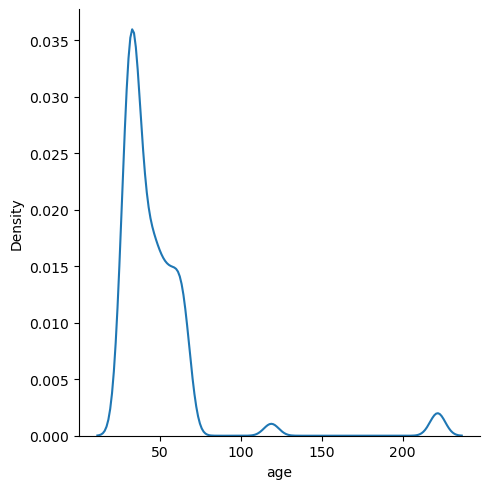

In [20]:
sns.histplot(consumption.age,kind ='kde')
plt.show()

In [21]:
#taking age at P95 i.e. 66
consumption[consumption.age > 66]

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17368,current,F,67,MEDIUM,42.3,6,631.0,1,12.0,721.000,2405.90,28933.37,5672.00,21473.00,1009.00,92.0,34,84,1,18,1,110000,1,1,1.0,1,9624.600,156215.3,24619.0,4856.0,37737.64,57512.00,2.0,4,10887.0,32616.00,36852.00,70,81,27418.0,59500.90,10425.53,2,79,12626.0,Y,4583.09,5712.0
10499,current,F,118,LOW,39.2,6,525.0,0,11.0,2448.575,6619.00,1416.50,3228.00,3194.20,6508.58,6.0,29,11,30,5,79,296000,1,1,1.0,1,250631.800,13299.0,300500.0,1444.0,35623.77,77501.38,4.0,4,23739.0,39857.78,30404.00,43,20,5675.0,10588.37,54491.00,22,0,118159.0,Y,1237.82,20360.0
2909,current,F,69,LOW,24.5,4,249.0,1,9.0,10643.000,1985.02,8385.50,4550.86,16406.00,1715.23,2.0,84,30,8,2,1,371000,1,1,1.0,1,173732.500,895000.0,1526.0,20513.0,29120.22,44375.00,10.0,1,28008.0,24103.38,34155.00,2,11,27624.0,100158.50,25379.00,9,83,24909.0,Y,492.11,6730.0
16874,current,M,67,LOW,23.5,8,594.0,1,6.0,5718.680,3300.01,4206.56,3407.00,47598.00,1772.00,44.0,1,9,8,25,55,100000,1,1,1.0,1,31454.100,159415.3,15654.0,0.0,24150.48,116097.00,23.0,0,36358.0,219565.69,51381.00,1,87,165407.0,186773.76,72171.00,117,10,30172.0,Y,2670.00,19009.0
15880,current,M,223,LOW,121.8,8,245.0,1,11.0,9660.860,1557.00,26557.10,3447.00,20961.00,1113.00,63.0,10,1,5,5,98,461000,1,1,1.0,1,58928.670,43397.0,50000.0,-4664.0,198281.15,10010.00,67.0,1,29565.0,13732.45,17846.00,3,104,51835.0,248344.03,143165.00,44,103,66817.0,Y,31745.07,20334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14342,current,M,67,MEDIUM,32.9,2,927.0,0,4.0,21337.500,544.00,19403.87,16205.74,22693.79,4751.83,2.0,46,2,5,4,1,520000,1,1,1.0,1,7300.000,100934.0,550.0,-6885.0,8534.00,56934.00,55.0,6,23528.0,39708.12,31494.00,9,11,98599.0,100090.55,44257.00,9,54,25142.0,Y,72379.91,3250.0
16502,current,F,219,MEDIUM,59.7,2,575.0,1,11.0,4049.650,8490.20,2597.17,9723.00,10397.97,7332.00,6.0,36,29,30,15,6,39000,1,1,1.0,1,55700.000,17000.0,12000.0,0.0,64270.78,380492.00,62.0,26,34850.0,30871.10,9756.31,3,20,71823.0,7426.04,783.00,10,11,38338.0,Y,1116.81,7061.0
2581,current,M,219,MEDIUM,99.5,2,315.0,1,16.0,5086.590,1541.00,869.00,53554.00,33900.00,9682.44,2.0,26,82,3,6,56,252000,1,1,1.0,1,293418.750,37000.0,26241.0,1444.0,20814.88,300222.61,46.0,1,20442.0,29226.00,33152.50,1,8,25032.0,36260.01,25079.00,2,107,15151.0,Y,3704.56,15552.0


In [22]:
consumption[consumption.age > 66].count()*100/len(consumption)

account_type                    4.66
gender                          4.66
age                             4.66
Income                          4.66
Emp_Tenure_Years                4.66
Tenure_with_Bank                4.66
region_code                     4.66
NetBanking_Flag                 4.66
Avg_days_between_transaction    4.66
cc_cons_apr                     4.66
dc_cons_apr                     4.66
cc_cons_may                     4.66
dc_cons_may                     4.66
cc_cons_jun                     4.66
dc_cons_jun                     4.66
cc_count_apr                    4.66
cc_count_may                    4.66
cc_count_jun                    4.66
dc_count_apr                    4.66
dc_count_may                    4.66
dc_count_jun                    4.66
card_lim                        4.66
personal_loan_active            4.66
vehicle_loan_active             4.66
personal_loan_closed            4.66
vehicle_loan_closed             4.66
investment_1                    4.66
i

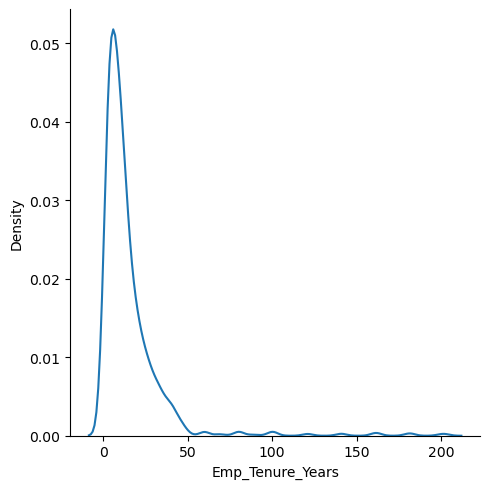

In [23]:
sns.displot(consumption.Emp_Tenure_Years,kind ='kde')
plt.show()

In [24]:
consumption[consumption.Emp_Tenure_Years > 66]

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15880,current,M,223,LOW,121.8,8,245.0,1,11.0,9660.86,1557.00,26557.10,3447.00,20961.00,1113.00,63.0,10,1,5,5,98,461000,1,1,1.0,1,58928.670,43397.00,50000.0,-4664.0,198281.15,10010.00,67.0,1,29565.0,13732.45,17846.00,3,104,51835.0,248344.03,143165.00,44,103,66817.00,Y,31745.07,20334.0
16158,saving,F,118,MEDIUM,98.0,3,535.0,1,13.0,12820.11,11358.00,3304.00,1008.00,24352.57,537.67,17.0,26,38,4,11,30,125000,1,1,1.0,1,1727970.900,69370.00,610000.0,26601.0,59368.13,175977.00,4.0,36,197960.0,33853.84,23405.00,5,171,28106.0,90932.03,27472.43,19,104,67787.00,Y,2633.92,84779.0
17956,saving,M,120,LOW,80.0,2,270.0,1,18.0,6111.02,1565.74,35562.32,1615.00,11497.29,1105.00,44.0,65,48,1,2,8,548000,1,1,1.0,1,11027.500,3.59,33774.0,-4664.0,38395.56,76699.10,42.0,4,17322.0,26473.56,77262.57,0,81,46852.0,55645.50,39005.00,14,76,112000.00,Y,36630.43,111888.0
2632,current,M,219,MEDIUM,159.2,6,355.0,1,13.0,3208.19,2287.52,6796.74,5946.00,11521.00,3567.00,50.0,22,9,2,1,2,352000,1,1,1.0,1,1269.200,68663.61,130000.0,14509.0,50501.75,67890.00,42.0,36,89698.0,83569.56,475717.72,1,50,12448.0,43724.25,57446.66,6,73,1224.39,Y,946.53,9083.0
3340,saving,M,118,MEDIUM,78.4,6,314.0,1,10.0,10476.00,139422.60,3127.00,1072.84,6216.22,3028.44,6.0,47,3,3,1,70,75000,1,1,1.0,1,41070.000,200926.00,24094.0,20513.0,22655.17,56107.50,46.0,15,21086.0,126043.25,92529.00,4,69,73710.0,31006.79,20355.00,41,79,38640.00,Y,1890.34,19449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,current,M,222,LOW,202.0,7,867.0,1,2.0,36777.09,10130.61,11835.00,6945.87,7118.51,2973.00,44.0,19,3,2,2,11,104000,1,1,1.0,1,384550.050,16000.00,16068.0,-5942.0,72054.00,290.09,43.0,4,30760.0,315799.00,29852.00,3,82,59500.0,16038.39,26487.00,5,21,26103.00,Y,1100.80,8694.0
15454,current,M,221,LOW,140.7,10,656.0,0,16.0,2687.85,9251.59,9276.54,394.00,5340.53,12670.16,26.0,18,59,7,6,11,378000,1,1,1.0,1,3299447.136,165970.90,6100.0,6916.0,53207.00,56859.00,11.0,26,29758.0,31560.79,55.00,4,27,43140.0,20746.44,43972.72,6,10,35418.00,Y,5170.83,119353.0
13524,current,M,219,MEDIUM,99.5,5,446.0,1,14.0,46893.17,1533.68,4437.77,4923.60,20182.55,634.00,4.0,23,4,24,4,67,395000,1,1,1.0,1,55700.000,760571.30,1266.0,173.0,90755.10,91773.00,2.0,1,17402.0,36573.99,10330.50,10,13,10277.0,32423.50,30574.00,9,13,28676.00,Y,904.65,12171.0


In [25]:
consumption.duplicated().sum()

0

In [26]:
consumption_new.duplicated().sum()

0

### Data Prepration

In [27]:
consumption.drop(columns = ['loan_enq' , 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed'], axis =1 , inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25228\1797525597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption.drop(columns = ['loan_enq' , 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed'], axis =1 , inplace = True)


In [28]:
consumption_new.drop(columns = ['loan_enq' , 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed'], axis =1 , inplace = True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_25228\4036478425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_new.drop(columns = ['loan_enq' , 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed'], axis =1 , inplace = True)


In [29]:
consumption.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 12554 to 4547
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_type                  15000 non-null  object 
 1   gender                        15000 non-null  object 
 2   age                           15000 non-null  int64  
 3   Income                        15000 non-null  object 
 4   Emp_Tenure_Years              15000 non-null  float64
 5   Tenure_with_Bank              15000 non-null  int64  
 6   region_code                   15000 non-null  float64
 7   NetBanking_Flag               15000 non-null  int64  
 8   Avg_days_between_transaction  14999 non-null  float64
 9   cc_cons_apr                   15000 non-null  float64
 10  dc_cons_apr                   15000 non-null  float64
 11  cc_cons_may                   15000 non-null  float64
 12  dc_cons_may                   15000 non-null  float64
 13

In [30]:
#outlier Treatemnet 
def outlier_treat(x):
    if np.issubdtype(x.dtype, np.number):
        x = x.clip(lower=x.quantile(0.01), upper=x.quantile(0.95))
    return x

In [31]:
consumption = consumption.apply(outlier_treat)

In [32]:
consumption_new = consumption_new.apply(outlier_treat)

In [33]:
consumption.age.unique()

array([35, 55, 29, 34, 27, 32, 28, 66, 37, 46, 38, 64, 33, 62, 60, 40, 63,
       30, 56, 47, 49, 31, 53, 44, 42, 36, 58, 51, 39, 50, 54, 61, 65],
      dtype=int64)

In [34]:
consumption_new.age.unique()

array([63, 36, 28, 32, 33, 60, 53, 47, 42, 44, 66, 27, 35, 46, 55, 62, 38,
       30, 40, 54, 37, 34, 49, 29, 58, 56, 31, 39, 51, 50, 64, 61, 65],
      dtype=int64)

In [35]:
#missing value treatment 
def missing_treat(x):
    if x.dtype == 'O':
        x = x.fillna(x.mode()[0])
    else:
        x = x.fillna(x.mean())
    return x

In [36]:
consumption = consumption.apply(missing_treat)

In [37]:
consumption_new = consumption_new.apply(missing_treat)

In [38]:
consumption.isna().sum()

account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_a

In [39]:
consumption_new.isna().sum()

account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_a

#### visualization

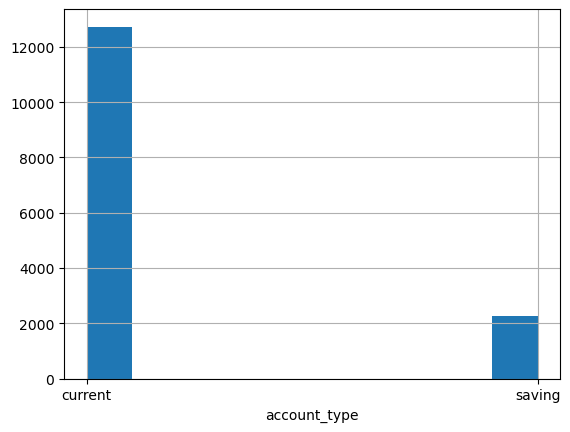

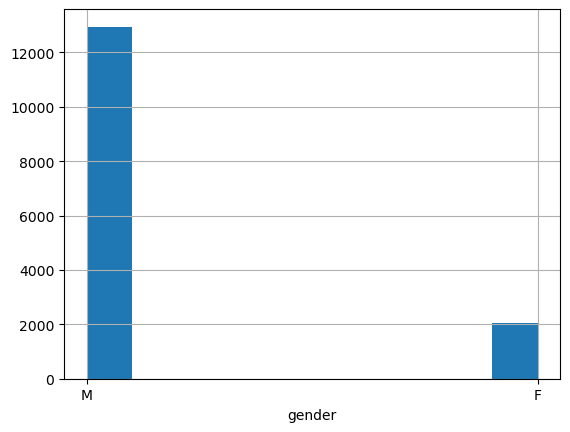

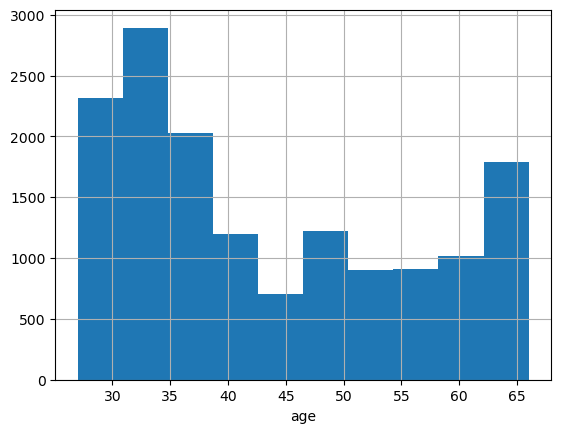

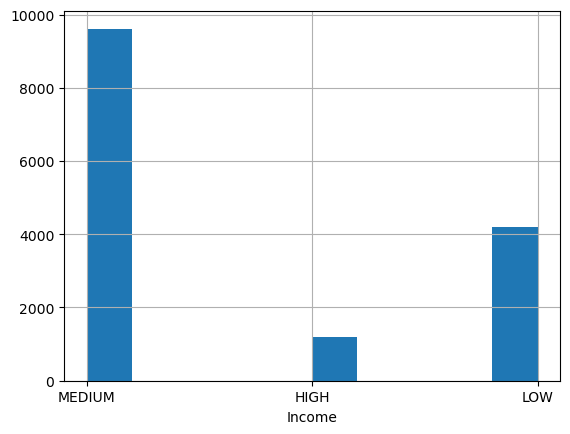

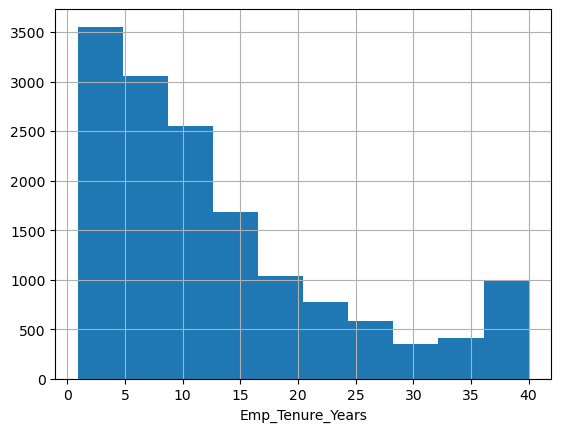

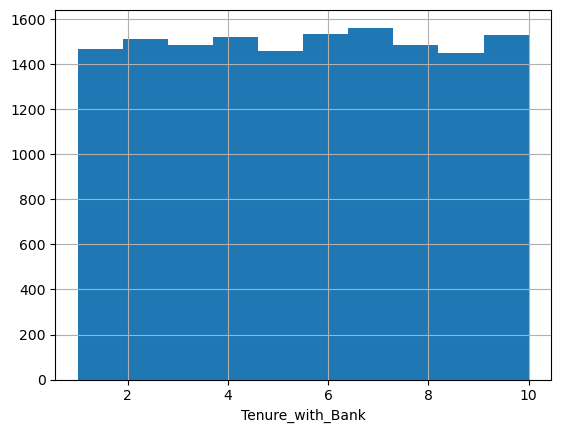

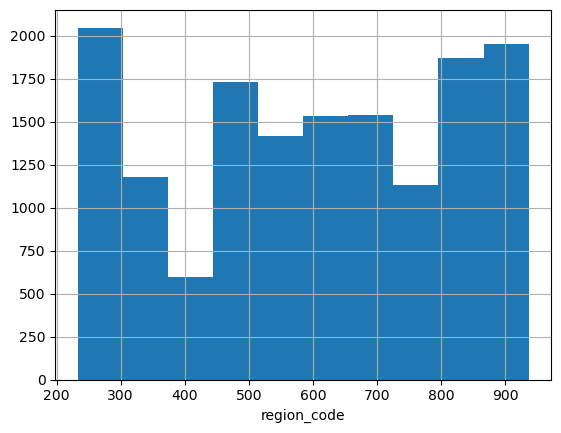

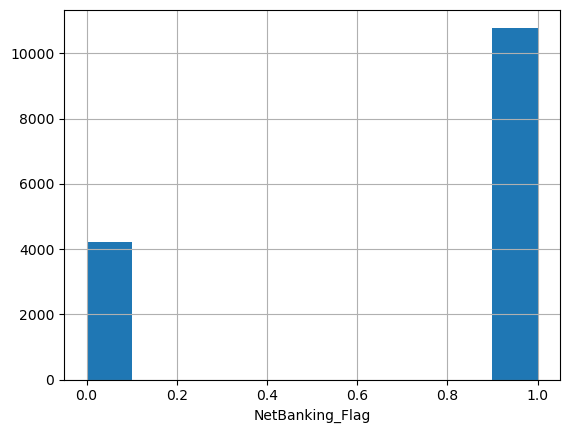

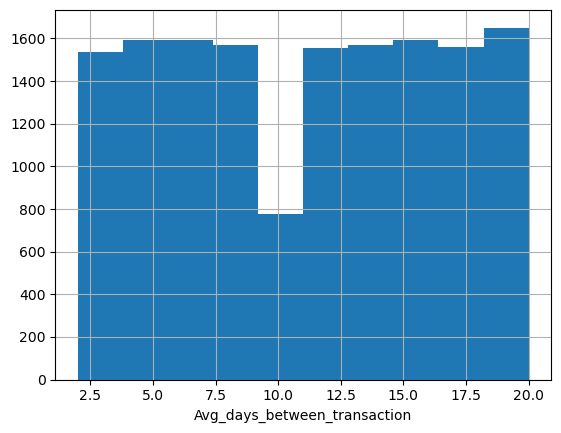

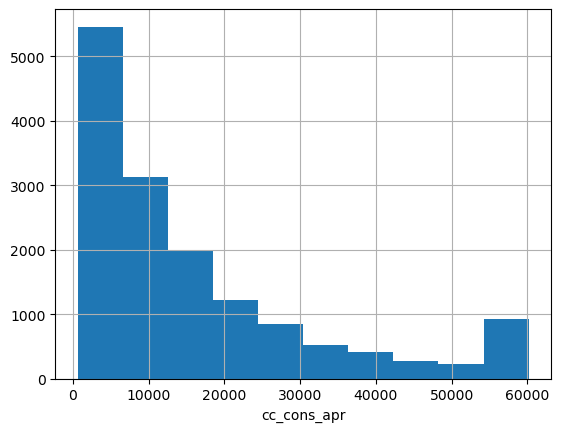

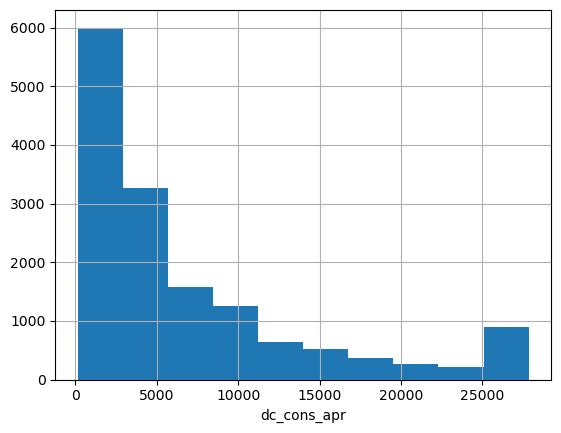

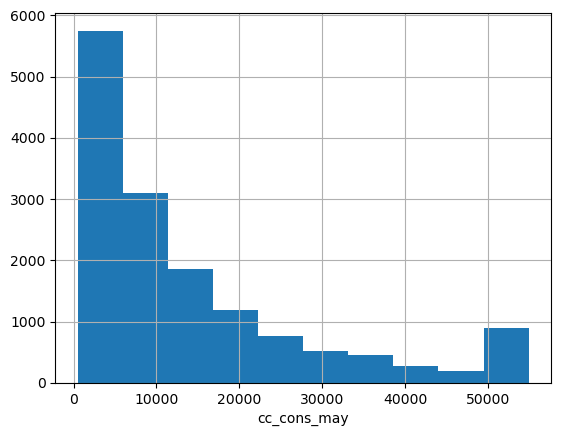

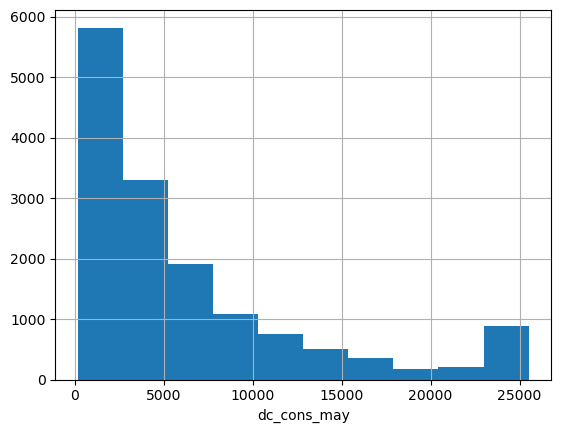

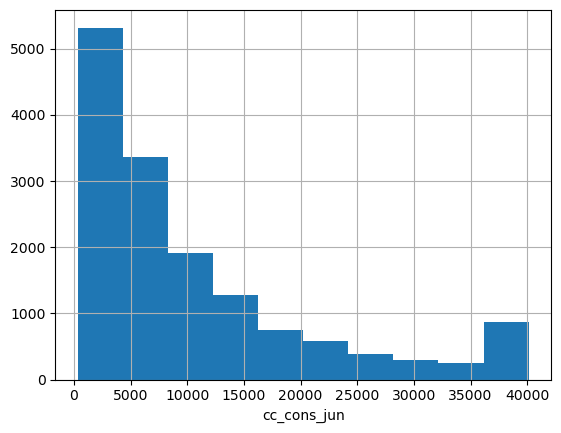

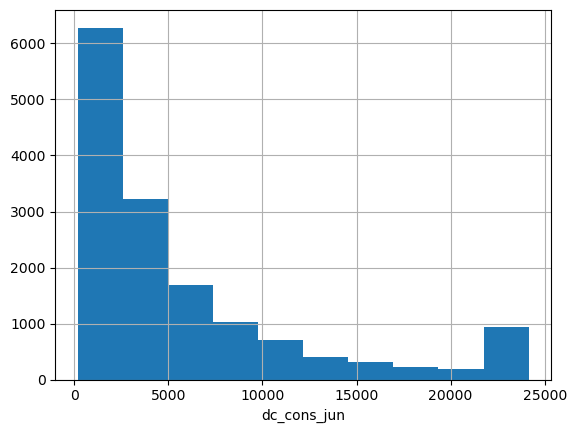

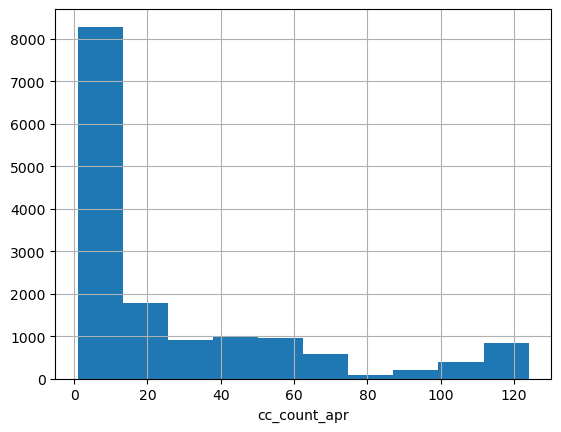

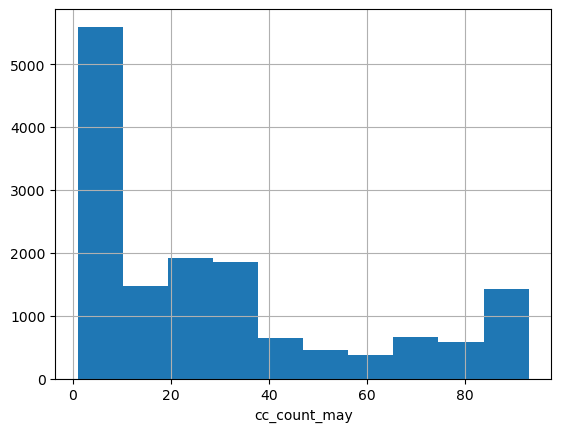

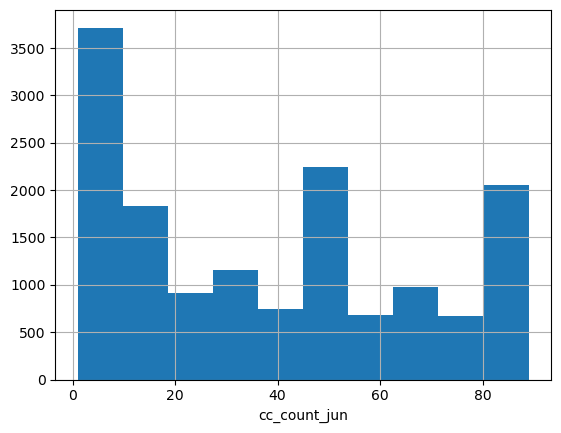

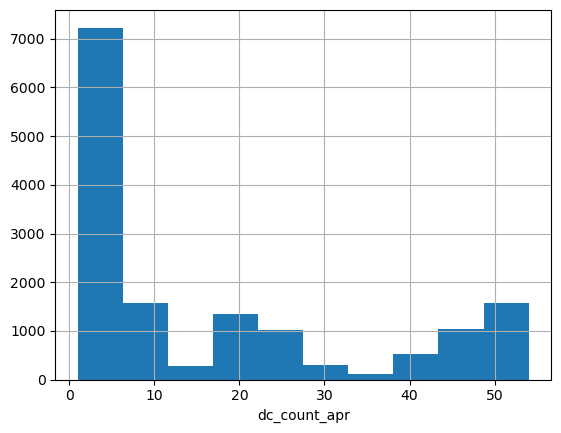

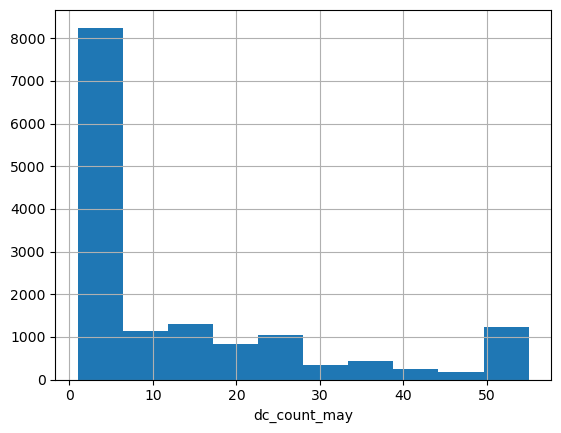

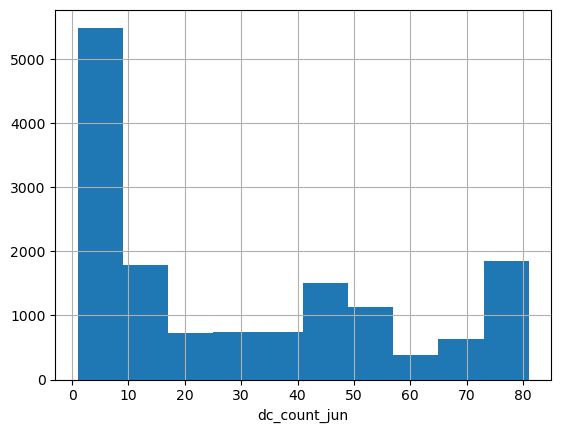

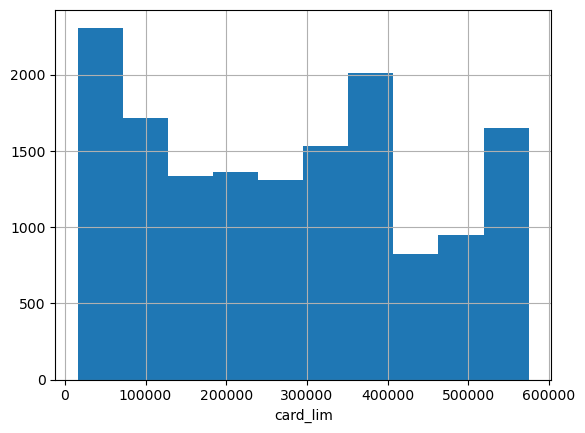

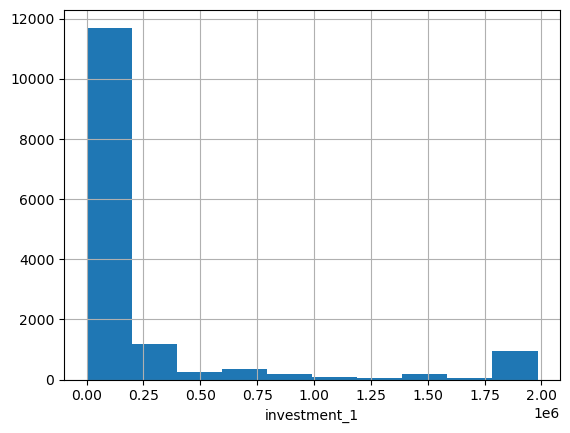

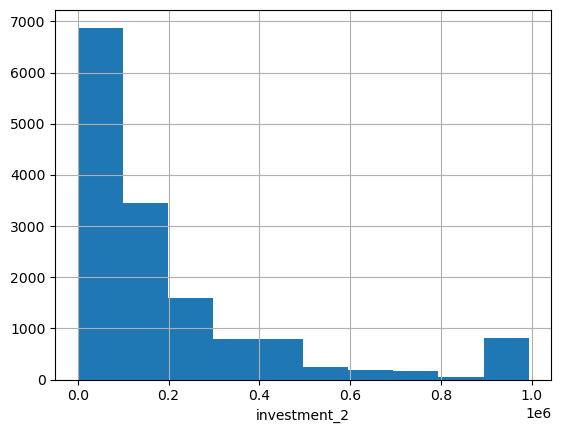

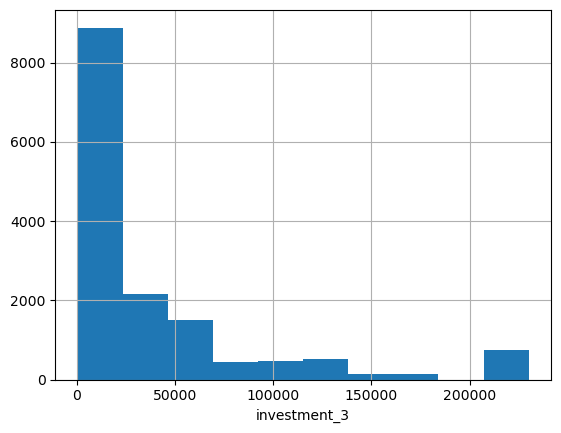

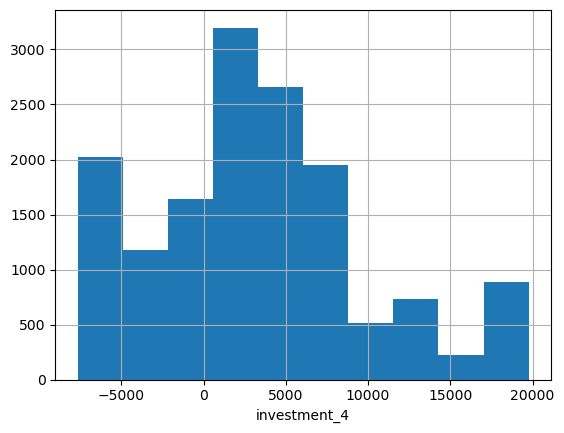

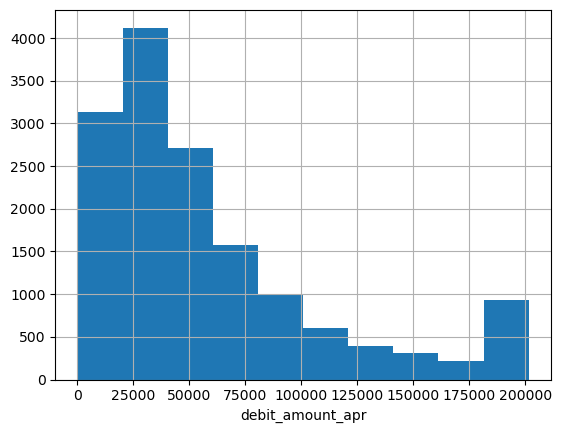

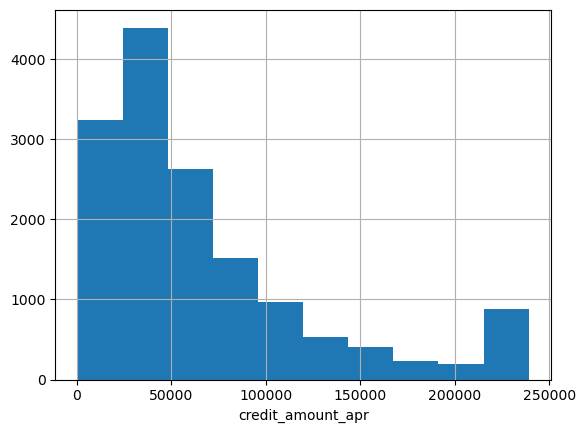

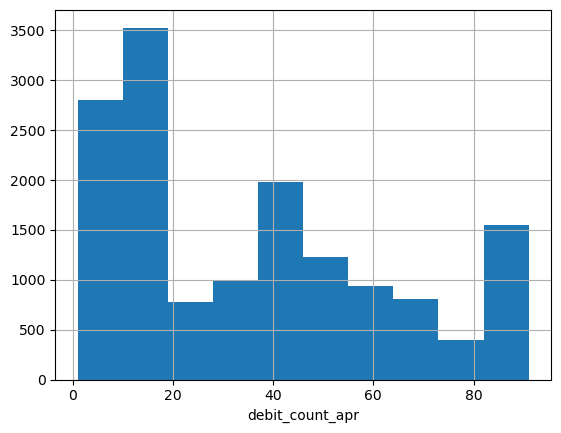

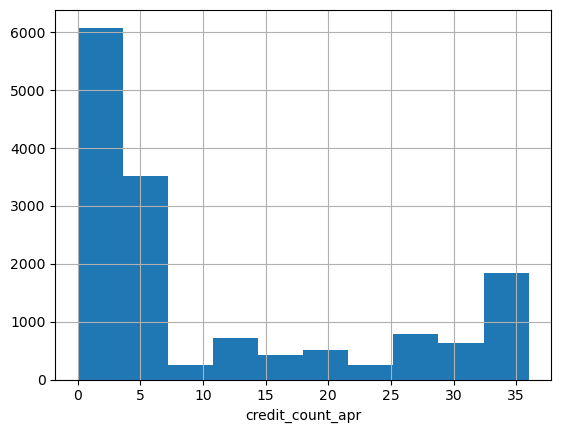

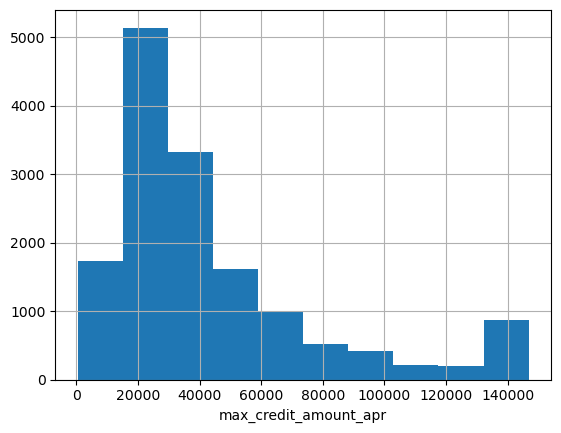

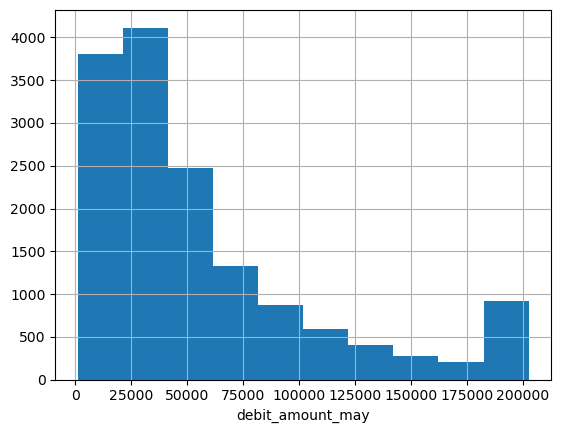

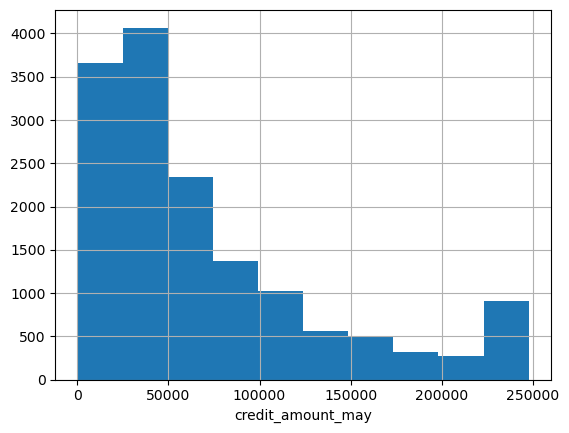

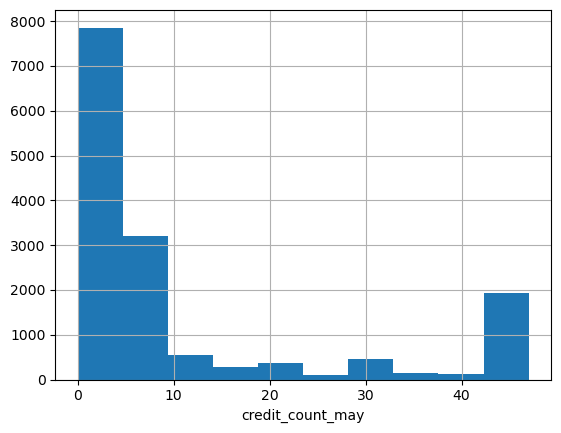

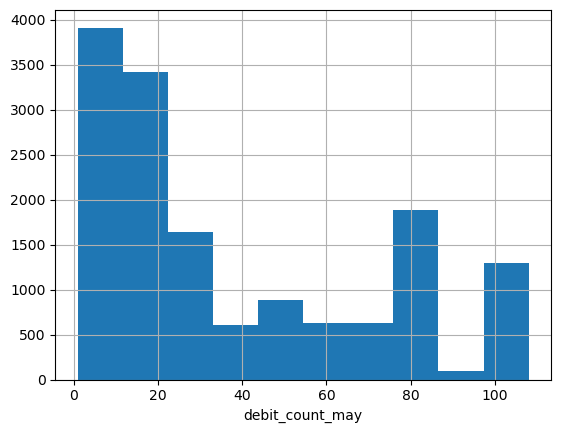

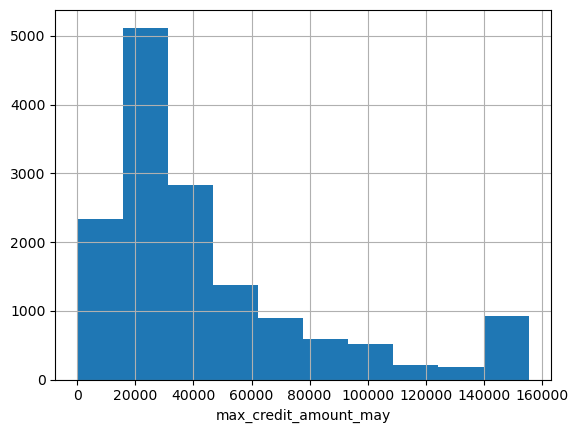

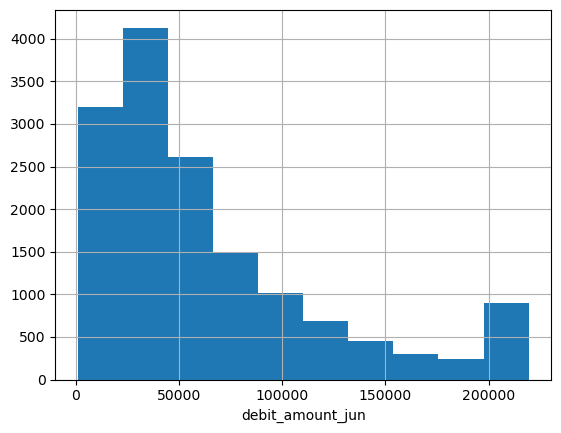

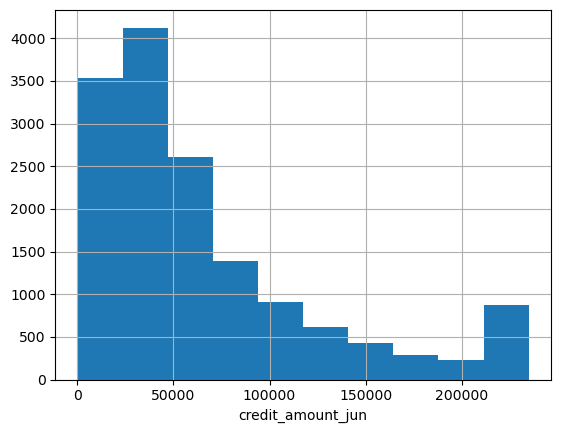

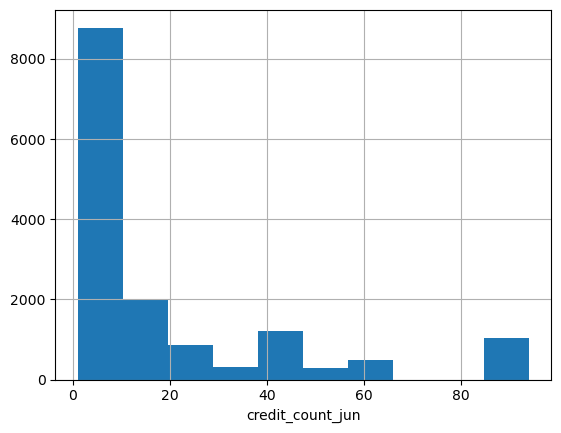

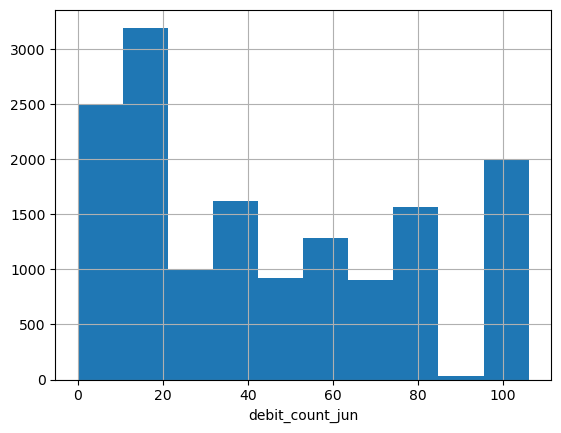

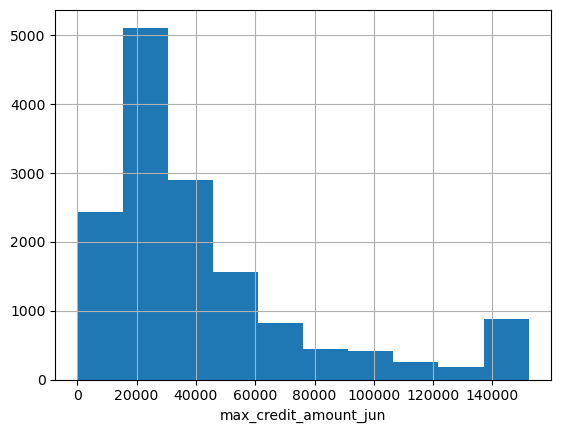

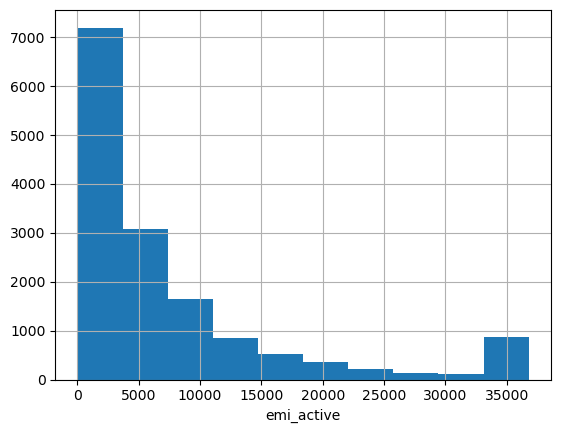

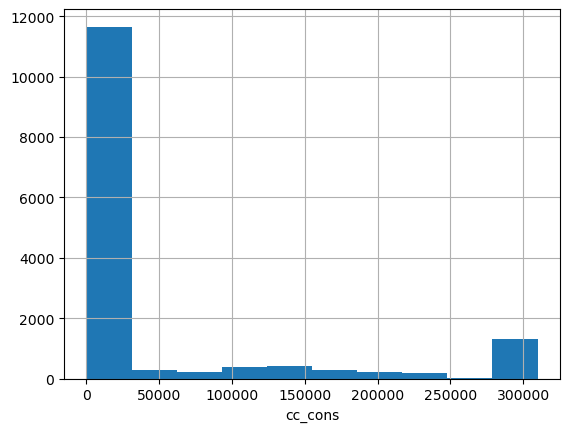

In [40]:
for i in consumption.columns:
    consumption[i].hist()
    plt.xlabel(str(i))
    plt.show()

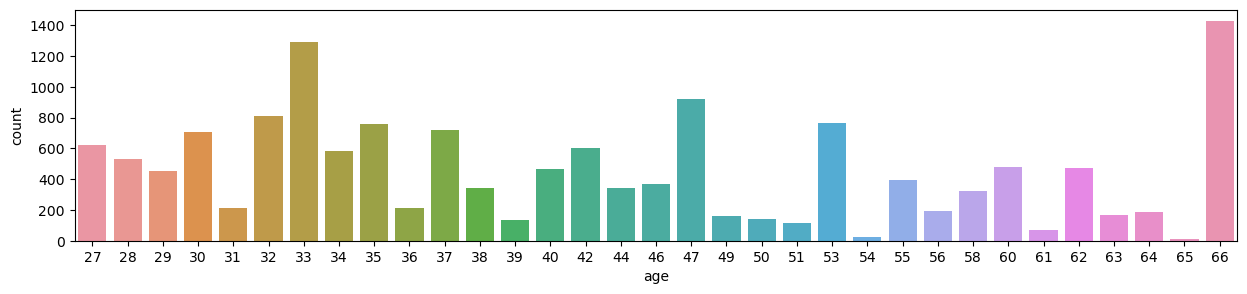

In [41]:
plt.figure(figsize=(15,3))
sns.countplot(consumption,x='age')
#consumption.age.value_counts().sort_values(ascending = True).plot(kind='bar')
plt.show()

<Axes: xlabel='Income', ylabel='count'>

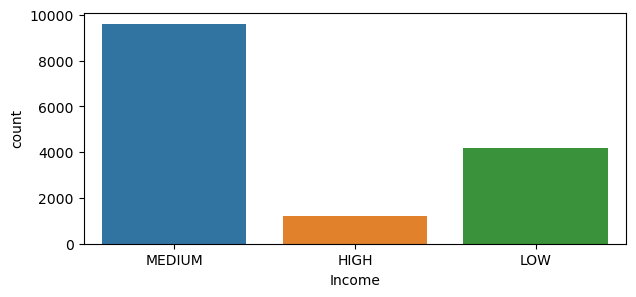

In [42]:
plt.figure(figsize=(7,3))
sns.countplot(data= consumption,x= 'Income')

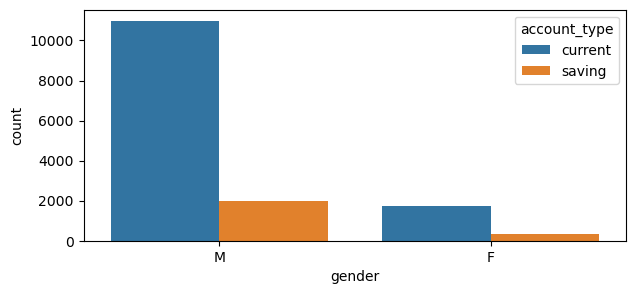

In [43]:
plt.figure(figsize=(7,3))
sns.countplot(consumption, x = 'gender', hue ='account_type')
consumption.groupby('gender')['cc_cons'].count()
plt.show()

<Axes: >

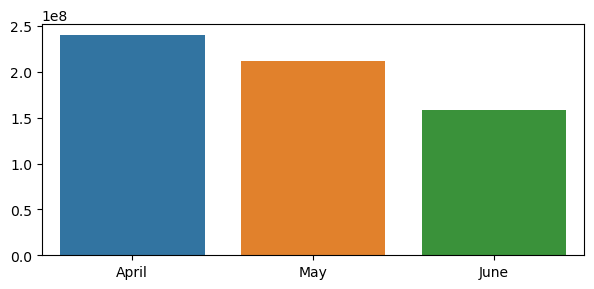

In [44]:
plt.figure(figsize=(7,3))
sns.barplot(x=['April','May','June'], y =[consumption['cc_cons_apr'].sum(),consumption['cc_cons_may'].sum(),consumption['cc_cons_jun'].sum()])

In [45]:
#checking the distribution of target variable

C:\Users\Dell\AppData\Local\Temp\ipykernel_25228\1563949118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(consumption['cc_cons'])


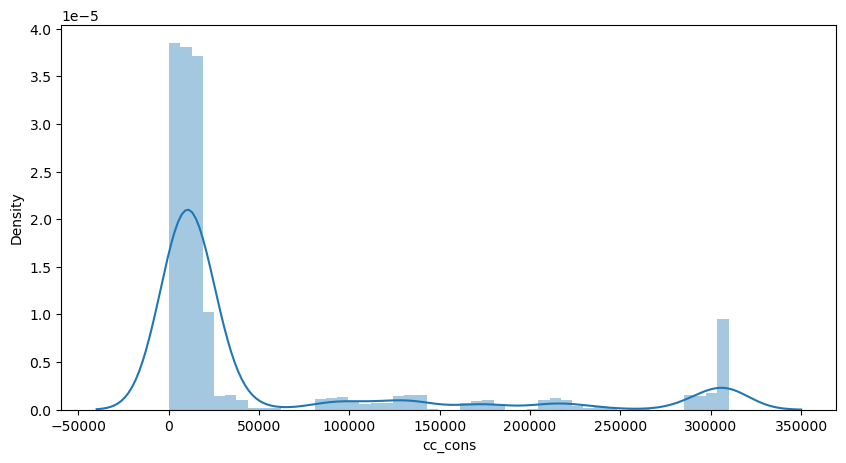

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(consumption['cc_cons'])
plt.show()

In [47]:
consumption.cc_cons.skew()

1.9922808525775306

In [48]:
consumption['CC_cons'] = np.log1p(consumption.cc_cons)

In [49]:
consumption['CC_cons'].skew()

0.24893816115798595

C:\Users\Dell\AppData\Local\Temp\ipykernel_25228\877899461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(consumption.CC_cons)


<Axes: xlabel='CC_cons', ylabel='Density'>

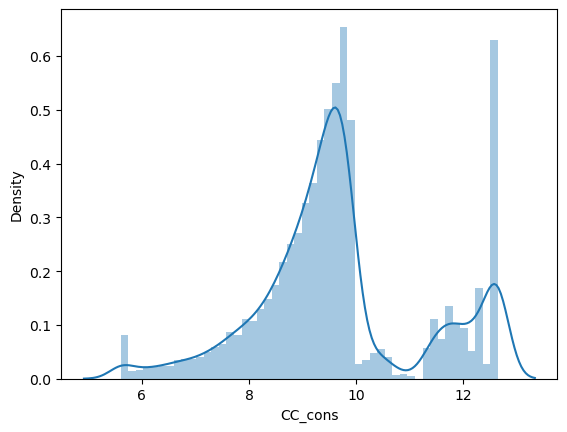

In [50]:
sns.distplot(consumption.CC_cons)


In [51]:
dummies = pd.get_dummies(consumption[['account_type','gender','Income']],drop_first= True)
consumption.drop(columns =['account_type','gender','Income'],inplace = True)
consumption  = pd.concat([consumption,dummies],axis=1)

In [52]:
dummies = pd.get_dummies(consumption_new[['account_type','gender','Income']],drop_first= True)
consumption_new.drop(columns =['account_type','gender','Income'],inplace = True)
consumption_new  = pd.concat([consumption_new,dummies],axis=1)

In [118]:

x = consumption.drop(columns= ['cc_cons','CC_cons'])
y  = consumption.cc_cons

In [54]:
x

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12554,35,15.0,1,708.0,0,17.0,24893.000,378.00,10288.00,25512.15,16291.4000,11432.00,2.0,26,10,48,14,47,430000,593.20,1244.14,787.0,6885.00000,85919.48,25192.0000,24.0,6,25296.0,11527.50,191777.13,2,40,24563.00,30051.32,12761.0000,2,65,50836.00,1674.09,0,1,0,1
17645,35,15.0,6,233.0,0,14.0,18941.620,966.00,20672.00,287.00,4217.0000,885.00,1.0,7,13,3,21,31,127500,213557.15,172678.56,90525.0,1500.00000,12255.75,88693.3700,35.0,36,80750.0,92276.57,71162.00,2,78,23948.00,42119.05,76206.0000,21,63,23226.00,13043.34,0,1,0,0
7604,55,24.5,1,802.0,1,3.0,5678.870,2724.00,1964.50,3933.11,23956.2500,5168.00,43.0,32,89,4,1,80,199999,165907.57,470000.00,25524.0,3735.00000,34193.00,84880.0000,72.0,9,38466.0,19343.00,70978.00,2,82,10752.00,58373.25,75283.0000,7,1,27036.00,25375.27,0,1,0,1
1590,29,4.5,6,867.0,1,4.0,30489.500,1236.00,12609.88,9138.14,17521.0000,13650.30,53.0,1,50,1,1,10,155000,81872.65,223379.40,48500.0,-4679.00000,11558.23,236326.0000,43.0,30,52732.0,43867.91,63033.84,23,38,12607.00,69851.51,68708.0000,21,83,43037.00,3544.33,0,0,0,1
16556,34,12.6,4,802.0,1,7.0,7441.400,6906.04,4364.00,1939.00,2121.0000,6829.18,67.0,47,82,54,16,68,297000,568.80,385000.00,183999.0,6916.00000,17022.81,58897.0300,46.0,36,19613.0,153253.71,30286.00,24,50,25213.00,10071.00,80140.0000,8,32,32044.00,12780.44,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,53,13.2,9,653.0,1,20.0,10443.760,1218.85,7252.24,3873.00,6633.0000,10107.00,3.0,36,3,44,55,29,520000,186189.00,24000.00,16215.0,977.00000,30608.54,31135.0000,79.0,2,27608.0,30501.77,23692.00,1,8,6936.00,219329.28,42625.5000,14,8,82851.00,36788.75,0,0,1,0
10376,44,2.4,9,535.0,1,2.0,29890.330,6308.00,16025.50,7610.00,2213.0800,841.60,1.0,34,4,7,1,2,472000,24832.00,221000.00,12337.0,-6281.37988,39903.00,23797.0000,43.0,2,30512.0,57918.69,50023.00,4,20,155502.75,8666.01,34987.5500,11,18,118110.47,4762.10,0,1,0,1
2181,37,3.4,9,464.0,1,8.0,4148.980,948.74,19360.26,494.00,40123.5695,1801.77,57.0,23,61,24,3,3,44000,180615.02,253000.00,25000.0,10210.00000,29525.63,95477.2700,4.0,1,41085.0,25404.75,35239.00,43,5,44421.00,97896.48,234766.7625,4,73,49545.00,2877.33,0,1,0,1


In [119]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=2, test_size=.1)

In [120]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(13500, 43)
(13500,)
(1500, 43)
(1500,)


In [121]:

lr = LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [122]:
lr_pred=lr.predict(train_x)
#lr_pred=np.expm1(lr.predict(train_x))
lrt_pred=lr.predict(test_x)
#lrt_pred=np.expm1(lr.predict(test_x))

In [123]:
print("RMLSE using Linear Regression :",mean_squared_log_error(train_y, lr_pred))

print("R2 using Linear Regression :",r2_score(train_y,lr_pred))

RMLSE using Linear Regression : 3.9722064555307885
R2 using Linear Regression : 0.002974246579147799


In [125]:
print('RMSE : ',mean_squared_error(train_y,lr_pred))

RMSE :  8360006960.271193


#### Standardizing for knn

In [126]:
std= StandardScaler()
train_x_std = std.fit_transform(train_x)
test_x_std = std.transform(test_x)

In [127]:
train_x_std = pd.DataFrame(train_x_std, columns = train_x.columns)
test_x_std = pd.DataFrame(test_x_std, columns = test_x.columns)

#### knn

In [128]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11],
                    'leaf_size':[20,30,40,50,60],
                    'weights' : ['uniform','distance']
                    }]

knn_reg = GridSearchCV(KNeighborsRegressor(),
                   tuned_parameters,
                   cv=4,verbose = True, n_jobs=-1)

data_knn = knn_reg.fit(train_x_std,train_y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [129]:
data_knn.best_estimator_

KNeighborsRegressor(leaf_size=20, n_neighbors=11)

In [130]:
data_knn.best_score_

-0.08531686136459293

In [131]:
pred_knn_train = data_knn.predict(train_x_std)
pred_knn_test = data_knn.predict(test_x_std)

#pred_knn_train = np.expm1(data_knn.predict(train_x_std))
#pred_knn_test = np.expm1(data_knn.predict(test_x_std))

In [132]:
train_mape = np.mean(np.abs(train_y-pred_knn_train)/pred_knn_train)
train_mape

1.1066577540481313

In [133]:
test_mape = np.mean(np.abs(test_y-pred_knn_test)/pred_knn_test)
test_mape

1.5993145748016344

In [140]:

train_rmspe = np.sqrt(np.mean((train_y-pred_knn_train)/pred_knn_train))
train_rmspe

C:\Users\Dell\AppData\Local\Temp\ipykernel_25228\1340401591.py:1: RuntimeWarning: invalid value encountered in sqrt
  train_rmspe = np.sqrt(np.mean((train_y-pred_knn_train)/pred_knn_train))


nan

In [139]:
test_rmspe = np.sqrt(np.mean((test_y-pred_knn_test)/pred_knn_test))
test_rmspe

0.6794039109682539

#### Decision Tree

In [141]:
dt = DecisionTreeRegressor()

In [142]:
param_grid = [{'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7),
              'criterion': ['squared_error']}]
data_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 3,verbose = True, n_jobs=-1)

In [143]:
data_tree.fit(train_x,train_y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['squared_error'],
                          'max_depth': array([2, 3, 4]),
                          'max_features': array([4, 5, 6])}],
             verbose=True)

In [151]:
data_tree.best_score_

-0.002726181840220813

In [145]:
pred_dt_train = data_tree.predict(train_x)
pred_dt_test = data_tree.predict(test_x)
#pred_dt_train = np.expm1(data_tree.predict(train_x))
#pred_dt_test = np.expm1(data_tree.predict(test_x))

In [146]:
train_mape = np.mean(np.abs(train_y-pred_dt_train)/pred_dt_train)
train_mape

1.2568663505543005

In [147]:
train_rmspe = np.sqrt(np.mean((train_y-pred_dt_train)/pred_dt_train))
train_rmspe

C:\Users\Dell\AppData\Local\Temp\ipykernel_25228\319007601.py:1: RuntimeWarning: invalid value encountered in sqrt
  train_rmspe = np.sqrt(np.mean((train_y-pred_dt_train)/pred_dt_train))


nan

### ensemble

#### Bagging 


In [148]:
pargrid_ada = {'n_estimators': [50,60,70,80,100]}

gscv_bagging = GridSearchCV(estimator=BaggingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)

In [149]:
data_bagg =gscv_bagging.fit(train_x, train_y)

In [150]:
bagg_train_pred=data_bagg.predict(train_x)
bagg_test_pred=data_bagg.predict(test_x)

#bagg_train_pred=np.expm1(data_bagg.predict(train_x))
#bagg_test_pred=np.expm1(data_bagg.predict(test_x))

In [152]:
RMSE_test = np.sqrt(mean_squared_error(train_y,bagg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,bagg_test_pred))
print(RMSE_test)

34961.16986906957
93268.83082316894


#### Random Forest

In [153]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)
data_rf.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [50, 60, 70, 80, 100]})

In [158]:
rf_train_pred=data_rf.predict(train_x)
rf_test_pred=data_rf.predict(test_x)

#rf_train_pred=np.expm1(data_rf.predict(train_x))
#rf_test_pred=np.expm1(data_rf.predict(test_x))

In [159]:
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,rf_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,rf_test_pred))
print(RMSE_test)


RMSE values for training and testing data :
91313.64409194219
91488.46705172704


#### Boosting

#### adaboost

In [160]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_boost=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [161]:
boost_train_pred=data_boost.predict(train_x)
boost_test_pred=data_boost.predict(test_x)

In [162]:
#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,boost_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,boost_test_pred))
print(RMSE_test)


RMSE values for training and testing data :
91323.16841075697
91539.11214736762


#### Gradient Boost 

In [163]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'max_depth':[2,3,4,5],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=GradientBoostingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_gbm=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:961: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


In [164]:
gbm_train_pred=data_gbm.predict(train_x)
gbm_test_pred=data_gbm.predict(test_x)

In [165]:
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,gbm_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,gbm_test_pred))
print(RMSE_test)


RMSE values for training and testing data :
91512.22828661806
91506.06580850258


#### XGboost

In [168]:
pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

data_xg=gscv_xg.fit(train_x, train_y)

In [169]:
#Predicting values for both training and testing data sets
xg_train_pred=data_xg.predict(train_x)
xg_test_pred=data_xg.predict(test_x)

In [170]:
#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,xg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,xg_test_pred))
print(RMSE_test)


RMSE values for training and testing data :
89430.8476949837
91642.15985897856


#### SVM

In [171]:
#Importing required modules
from sklearn.svm import SVR
from sklearn.svm import LinearSVR 

In [ ]:
#Model building using Linear svm 
tuned_parameters = [{'C': [1,0.1,0.001,10,100],
                    'gamma':[0.0001, 0.001, 0.01, 0.1],
                    'kernel':['linear','rbf','poly']}]

svr_reg = GridSearchCV(SVR(),
                   tuned_parameters,
                   cv=3)

data_svr = svr_reg.fit(train_x,train_y)

In [ ]:
#Predicting values for both training and testing data sets
L_svr_train_pred=data_svr.predict(train_x)
L_svr_test_pred=data_svr.predict(test_x)

In [ ]:
#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,L_svr_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,L_svr_test_pred))
print(RMSE_test)

### ANN

In [ ]:
pargrid_ann = {'activation': ['relu','tanh','logistic','identity'],
               'alpha':[0.0001,0.001,0.01,1,10,100,1000]}

ann_reg = GridSearchCV(MLPRegressor(),pargrid_ann,cv=3)

data_ann = ann_reg.fit(train_X,train_y)

In [ ]:
#Predicting values for both training and testing data sets
ann_train_pred=data_ann.predict(train_X)
ann_test_pred=data_ann.predict(test_X)

In [ ]:
#Root Mean Squared error  
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,ann_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,ann_test_pred))
print(RMSE_test)